<a href="https://colab.research.google.com/github/roshanraii/typeofball-classifier/blob/master/notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this notebook, I'm going to create a dataset by scraping the google images using a javascript query.**

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

In Google Chrome press CtrlShiftj on Windows/Linux and CmdOptj on macOS, and a small window the javascript 'Console' will appear. In Firefox press CtrlShiftk on Windows/Linux or CmdOptk on macOS. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. Then you can run the following commands:

In [ ]:
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

***When file automatically gets downloaded then make sure to rename the file to appropriate names explained below..***

upload file renamed to ***filename.csv***

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving americanfootball.csv to americanfootball.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving baseball.csv to baseball.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving basketball.csv to basketball.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cricketball.csv to cricketball.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving golfball.csv to golfball.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving football.csv to football.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving handball.csv to handball.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tennisball.csv to tennisball.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving volleyball.csv to volleyball.csv


***Importing required libraries***

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
img_counter=[]
img_counter.append(10)

***Defining Structure of folder to store data and then downloading the data***

In [ ]:
folder = 'americanfootball'
url_file = 'americanfootball.csv'
path = Path('my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)

In [ ]:
folder = 'baseball'
url_file = 'baseball.csv'
path = Path('my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)

In [ ]:
folder = 'basketball'
url_file = 'basketball.csv'
path = Path('my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)

In [ ]:
folder = 'cricketball'
url_file = 'cricketball.csv'
path = Path('my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)

In [ ]:
folder = 'football'
url_file = 'football.csv'
path = Path('my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)

In [ ]:
folder = 'golfball'
url_file = 'golfball.csv'
path = Path('my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)

In [ ]:
folder = 'handball'
url_file = 'handball.csv'
path = Path('my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)

In [ ]:
folder = 'tennisball'
url_file = 'tennisball.csv'
path = Path('my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)

In [ ]:
folder = 'volleyball'
url_file = 'volleyball.csv'
path = Path('my_data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(url_file, dest, max_pics=1000)

***Definig classes that data contains Although it is not required for training purpose but we will use it for other purposes***

In [ ]:
classes = ['americanfootball','baseball','basketball','cricketball','football','golfball','handball','tennisball','volleyball']

***Making sure that every image is readable else image get deleted***

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

americanfootball


baseball


basketball


cricketball


football


golfball


handball


tennisball


volleyball


***Creating data bunch***

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['americanfootball',
 'baseball',
 'basketball',
 'cricketball',
 'football',
 'golfball',
 'handball',
 'tennisball',
 'volleyball']

***Looking at the data***

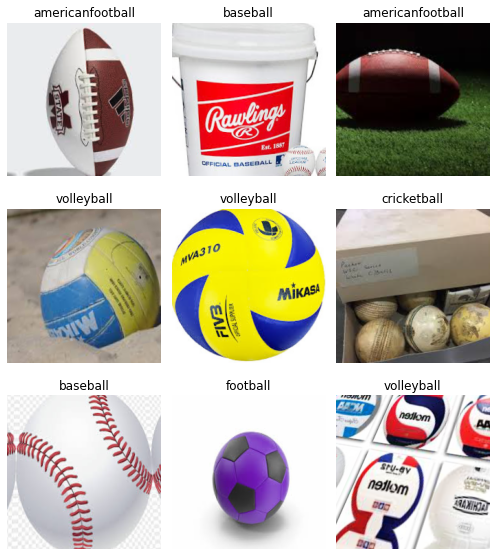

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['americanfootball',
  'baseball',
  'basketball',
  'cricketball',
  'football',
  'golfball',
  'handball',
  'tennisball',
  'volleyball'],
 9,
 3448,
 861)

**it's time to upload our data to our kaggle account**

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"roshanraii","key":"7ba5c08ff722f462693fc125e9b357d1"}'}

In [ ]:
 ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

**using init method we will generate metadata.jason on a specified location**

In [ ]:
!kaggle datasets init -p '/content/my_data'

Data package template written to: /content/my_data/dataset-metadata.json


**before going further we have to edit the title,slug by opening the metadata.json file from file browser by going on specified location where we generated in commands**

it's time to upload the dataset to your kaggle account

In [ ]:
!kaggle datasets create --dir-mode "tar" -p '/content/my_data'

Starting upload for file football.tar
100% 5.62M/5.62M [00:02<00:00, 2.20MB/s]
Upload successful: football.tar (6MB)
Starting upload for file tennisball.tar
100% 3.50M/3.50M [00:04<00:00, 911kB/s]
Upload successful: tennisball.tar (3MB)
Starting upload for file basketball.tar
100% 3.95M/3.95M [00:03<00:00, 1.11MB/s]
Upload successful: basketball.tar (4MB)
Starting upload for file volleyball.tar
100% 5.39M/5.39M [00:04<00:00, 1.39MB/s]
Upload successful: volleyball.tar (5MB)
Starting upload for file handball.tar
100% 4.98M/4.98M [00:04<00:00, 1.05MB/s]
Upload successful: handball.tar (5MB)
Starting upload for file cricketball.tar
100% 3.39M/3.39M [00:03<00:00, 929kB/s]
Upload successful: cricketball.tar (3MB)
Starting upload for file americanfootball.tar
100% 4.38M/4.38M [00:04<00:00, 1.11MB/s]
Upload successful: americanfootball.tar (4MB)
Starting upload for file baseball.tar
100% 5.59M/5.59M [00:04<00:00, 1.46MB/s]
Upload successful: baseball.tar (6MB)
Starting upload for file golfbal

**dataset is created** 😆